# NYPD Arrest Data Analysis

In [1]:
# Import Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn

df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_ (1).csv',index_col=0)

df

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)


# Analysis/ Clean Up

In [2]:
# Print Function To Show Column Names

print(df.columns)


Index(['ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE',
       'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE',
       'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')


In [3]:
# Analysis used to drop specific columns

drop_cols = ['PD_CD','KY_CD','LAW_CODE','ARREST_BORO','PD_DESC','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column']
df.drop(drop_cols,inplace=True,axis=1)

In [4]:
# Print function to show column names after columns were dropped

print(df.columns)

Index(['ARREST_DATE', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_PRECINCT',
       'AGE_GROUP', 'PERP_SEX', 'PERP_RACE'],
      dtype='object')


In [5]:
# Analysis to rename columns

df=df.rename(columns={'ARREST_DATE':'Arrest Date','OFNS_DESC':'Offense','ARREST_PRECINCT':'Precinct','AGE_GROUP':'Age Group','PERP_SEX':'Sex','PERP_RACE':'Race','LAW_CAT_CD':'Crime Type'})

In [6]:
#Column Renaming Results 

df

,Arrest Date,Offense,Crime Type,Precinct,Age Group,Sex,Race
ARREST_KEY,,,,,,,
238013474,12/18/2021,RAPE,F,105,18-24,M,BLACK
236943583,11/25/2021,ARSON,F,69,25-44,M,BLACK
234938876,10/14/2021,SEX CRIMES,F,61,25-44,M,WHITE
234788259,10/11/2021,ARSON,F,42,18-24,M,BLACK
234188790,09/28/2021,NaN,M,44,25-44,M,BLACK
...,...,...,...,...,...,...,...
222884924,01/10/2021,ROBBERY,F,46,45-64,M,BLACK
223918625,02/03/2021,DANGEROUS WEAPONS,F,67,18-24,M,BLACK
224323770,02/13/2021,ASSAULT 3 & RELATED OFFENSES,M,121,45-64,M,BLACK


In [7]:
# Data count by column

df.count()

Arrest Date    155507
Offense        155404
Crime Type     154114
Precinct       155507
Age Group      155507
Sex            155507
Race           155507
dtype: int64

In [8]:
# Dropping of duplicate data

df=df.drop_duplicates()

In [9]:
# Count after dropping duplicates

df.count()

Arrest Date    135174
Offense        135075
Crime Type     134056
Precinct       135174
Age Group      135174
Sex            135174
Race           135174
dtype: int64

# Which age group has the highest crime count?

In [10]:
# Offense grouping count by age group

df.groupby(['Age Group'])['Offense'].count()

Age Group
18-24    25592
25-44    76419
45-64    26838
65+       2187
<18       4039
Name: Offense, dtype: int64

<AxesSubplot:xlabel='Age Group'>

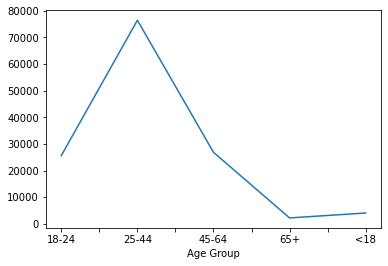

In [11]:
# Line graph showing Offense count by Age Group

df.groupby('Age Group').size().plot(kind='line')

# Which race has the lowest crime count?

In [12]:
# Offense grouping by Race count

df.groupby(['Race'])['Offense'].count()

Race
AMERICAN INDIAN/ALASKAN NATIVE      422
ASIAN / PACIFIC ISLANDER           7783
BLACK                             65918
BLACK HISPANIC                    12085
UNKNOWN                             562
WHITE                             14850
WHITE HISPANIC                    33455
Name: Offense, dtype: int64

<AxesSubplot:ylabel='Race'>

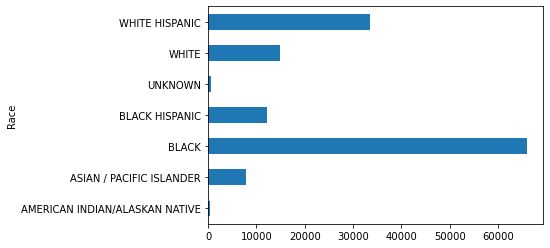

In [13]:
# Bar graph showing Offense count by Race

df.groupby('Race').size().plot(kind='barh')


# Which sex was arrested the most for rape?

In [14]:
# New dataframe to show Offense rape data

df2=df[df['Offense']=='RAPE']

In [15]:
# DF2 results for Rape Offense

df2

,Arrest Date,Offense,Crime Type,Precinct,Age Group,Sex,Race
ARREST_KEY,,,,,,,
238013474,12/18/2021,RAPE,F,105,18-24,M,BLACK
234117071,09/27/2021,RAPE,F,84,25-44,M,BLACK
233740512,09/18/2021,RAPE,F,41,25-44,M,WHITE HISPANIC
233697123,09/17/2021,RAPE,F,105,25-44,M,BLACK
231852329,08/05/2021,RAPE,F,25,25-44,M,WHITE HISPANIC
...,...,...,...,...,...,...,...
223666767,01/28/2021,RAPE,F,5,45-64,M,WHITE
223385210,01/21/2021,RAPE,F,90,25-44,M,WHITE HISPANIC
224093642,02/08/2021,RAPE,F,77,<18,M,BLACK


In [16]:
# Rape Offense count by Sex

df2.groupby(['Sex'])['Offense'].count()

Sex
F      8
M    578
Name: Offense, dtype: int64

<AxesSubplot:xlabel='Sex'>

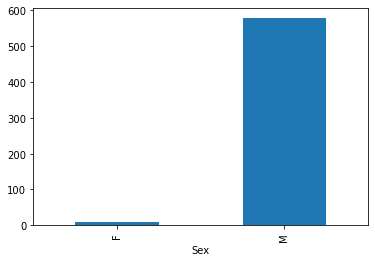

In [17]:
# bar graph showing count for Rape Offesnse by Sex

df2.groupby('Sex').size().plot(kind='bar')

# How many offenses has a crime type of F?

In [18]:
# Grouping by Crime Type count

df.groupby(['Crime Type'])['Crime Type'].count()

Crime Type
F    60239
I      229
M    73213
V      375
Name: Crime Type, dtype: int64

<AxesSubplot:ylabel='None'>

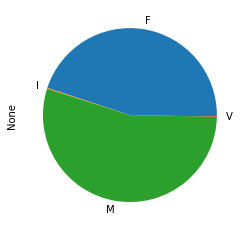

In [19]:
#Pie graph showing breakdown by crime type
df.groupby('Crime Type').size().plot(kind='pie')

<AxesSubplot:xlabel='Crime Type'>

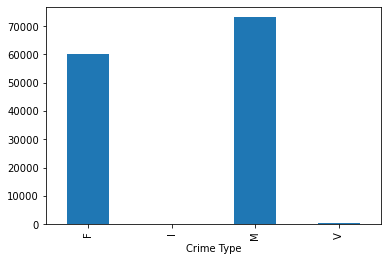

In [20]:
# bar graph showing Crime type count
df.groupby('Crime Type').size().plot(kind='bar')

# Conclusion
After completing my analysis I was able to see there are more crimes commited by men in the age groups of 25-44 compared to crimes commited by women and that black men have the highest arrest count compared to other races.